In [1]:
import os
import math
from glob import glob
import itertools
import numpy as np
import pandas as pd
from pydicom.filereader import dcmread
import matplotlib.pyplot as plt
import cv2
from keras.models import save_model, load_model
from rsna_model_utils import pixel_and_meta_data, plot_image, create_label, rsna_generator, chunk
from rsna_loss_function import RSNA_Loss

Using TensorFlow backend.


# RSNA Pneumonia Detection: Classifying and localising regions of lung opacities in chest radiographs

In [12]:
medical_files_train = glob("./rsna-pneumonia-detection-challenge-data/stage_2_train_images/*.dcm")

In [13]:
len(medical_files_train)

26684

In [14]:
df_train_labels = pd.read_csv("./rsna-pneumonia-detection-challenge-data/stage_2_train_labels.csv")
df_train_labels.set_index("patientId", inplace=True)

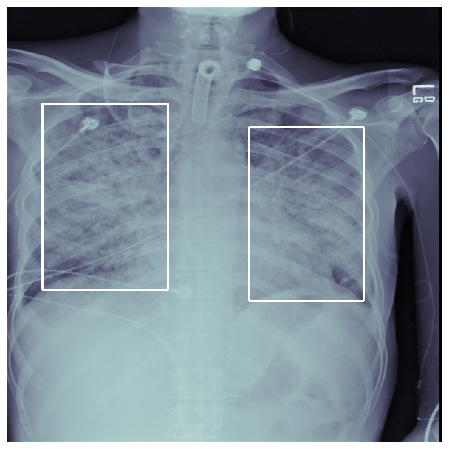

In [15]:
plot_image(medical_files_train[3], df_train_labels)

# Preprocess Images 

Taking inspiration from the YOLO algorithm (You Only Look Once) we split each image into a 20X20X5 grid.

The 5 components in the third dimension represent (Pp,bx,by,bw,bh,T):

Pp - Probability of pneumonia in that grid
bx - x of upper left
by - y of upper left
bw - bounding box width
bh - boundng box height
T - Target (0 or 1)


# RSNA Pneumonia Detection Model

In [6]:
from rsna_model import rsna_model

In [7]:
rsna_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024, 1024, 1)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 204, 204, 16)      800       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 102, 102, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        41504     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 32)        50208     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 32)        0   

In [8]:
medical_files_test = itertools.cycle(medical_files_train[int(0.8*len(medical_files_train)):])
medical_files_train = itertools.cycle(medical_files_train[0:int(0.8*len(medical_files_train))])

In [9]:
#medical_files_train = itertools.cycle([medical_files_train[4],medical_files_train[12]])

In [10]:
next(medical_files_train)

'./rsna-pneumonia-detection-challenge-data/stage_2_train_images\\0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm'

In [225]:
rsna_model.fit_generator(rsna_generator(medical_files_train, df_train_labels), steps_per_epoch=417, epochs=3)

Epoch 1/3
417/417 [==============================] - 3590s 9s/step - loss: 443.9291
Epoch 2/3
 76/417 [====>.........................] - ETA: 49:23 - loss: 436.2567

KeyboardInterrupt: 

In [215]:
model = rsna_model

In [216]:
save_model(rsna_model,"rsna.h5")

# Testing Model

In [218]:
from rsna_loss_function import RSNA_Loss

In [ ]:
rsna_model

In [223]:
rsna_model = load_model("rsna.h5", custom_objects={"RSNA_Loss":RSNA_Loss()})

ValueError: Unknown loss function: RSNA_Loss

In [ ]:
#medical_files_test = glob("./rsna-pneumonia-detection-challenge-data/stage_2_test_images/*.dcm")

In [ ]:
#len(medical_files_test)

In [ ]:
medical_files_test = medical_files_train[int(0.8*len(medical_files_train)):]

In [30]:
from rsna_4 import pixel_and_meta_data, plot_image, create_label, rsna_generator, chunk

True Labels: [1, 202.0, 557.0, 203.0, 301.0]

Predicted Labels: [0.027921107, 818, 333, 147, 271]
Predicted Labels: [0.021605838, -30, 407, 180, 288]
Predicted Labels: [0.02506593, 477, 399, 200, 317]
Predicted Labels: [0.023931941, -29, 512, 179, 284]
Predicted Labels: [0.030009484, 723, 569, 98, 167]
Predicted Labels: [0.020499134, -32, 614, 184, 291]



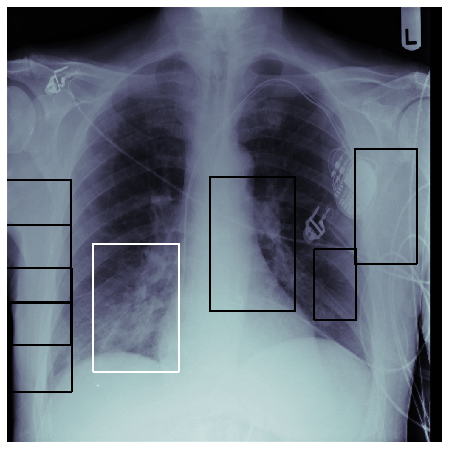

In [306]:
import random
plot_image(next(medical_files_test), df_train_labels, model=rsna_model)